**Data Import**

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import pickle

from statsmodels.regression.linear_model import OLSResults

In [2]:
# Specify file paths
account_ownership_path = 'account_ownership_data.csv'
gdp_path = 'gdp_data.csv'
cpi_path = 'cpi_data.csv'


In [3]:
# Load CSV files
account_ownership_data = pd.read_csv(account_ownership_path)
gdp_data = pd.read_csv(gdp_path)
cpi_data = pd.read_csv(cpi_path)



In [4]:
# View the imported data
print("Account Ownership Data:")
print(account_ownership_data.head())

print("\nGDP Data:")
print(gdp_data.head())

print("\nCPI Data:")
print(cpi_data.head())

Account Ownership Data:
                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                      Indicator Name  Indicator Code  1960  \
0  Account ownership at a financial institution o...  FX.OWN.TOTL.ZS   NaN   
1  Account ownership at a financial institution o...  FX.OWN.TOTL.ZS   NaN   
2  Account ownership at a financial institution o...  FX.OWN.TOTL.ZS   NaN   
3  Account ownership at a financial institution o...  FX.OWN.TOTL.ZS   NaN   
4  Account ownership at a financial institution o...  FX.OWN.TOTL.ZS   NaN   

   1961  1962  1963  1964  1965  ...  2013   2014  2015  2016   2017  2018  \
0   NaN   NaN   NaN   NaN   NaN  ...   NaN    NaN   NaN   NaN    NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  ...   NaN    NaN   NaN   NaN    NaN

Data Selection, Visualization and Pre-Processing

In [5]:
# Selecting data for Kenya
country = 'Kenya'



In [6]:
# Filter data for Kenya from 2011 to 2021
years_to_include = [str(year) for year in range(2011, 2022)]

account_ownership_country = account_ownership_data.loc[
    (account_ownership_data['Country Name'] == country),
    ['Indicator Code'] + years_to_include
]

gdp_country = gdp_data.loc[
    (gdp_data['Country Name'] == country),
    ['Indicator Code'] + years_to_include
]

cpi_country = cpi_data.loc[
    (cpi_data['Country Name'] == country),
    ['Indicator Code'] + years_to_include
]


In [7]:
# View filtered data for Kenya only

print("Account Ownership Kenya:")
print(account_ownership_country.head())

print("\nGDP Data Kenya:")
print(gdp_country.head())

print("\nCPI Data Kenya:")
print(cpi_country.head())

Account Ownership Kenya:
     Indicator Code   2011  2012  2013   2014  2015  2016   2017  2018  2019  \
121  FX.OWN.TOTL.ZS  42.34   NaN   NaN  74.66   NaN   NaN  81.57   NaN   NaN   

     2020  2021  
121   NaN  79.2  

GDP Data Kenya:
        Indicator Code      2011     2012      2013      2014      2015  \
121  NY.GDP.MKTP.KD.ZG  5.121106  4.56868  3.797848  5.020111  4.967721   

         2016      2017      2018      2019      2020      2021  
121  4.213517  3.837958  5.647946  5.114159 -0.272766  7.590489  

CPI Data Kenya:
     Indicator Code       2011      2012      2013      2014      2015  \
121  FP.CPI.TOTL.ZG  14.022494  9.377767  5.717494  6.878155  6.582174   

         2016      2017     2018     2019      2020      2021  
121  6.297158  8.005723  4.68982  5.23586  5.404815  6.110909  


In [8]:
# Check for missing values for Kenya

print("Account Ownership Kenya - Missing Data:")
print(account_ownership_country.isnull().sum())

print("\nGDP Data Kenya - Missing Data:")
print(gdp_country.isnull().sum())

print("\nCPI Data Kenya - Missing Data:")
print(cpi_country.isnull().sum())


Account Ownership Kenya - Missing Data:
Indicator Code    0
2011              0
2012              1
2013              1
2014              0
2015              1
2016              1
2017              0
2018              1
2019              1
2020              1
2021              0
dtype: int64

GDP Data Kenya - Missing Data:
Indicator Code    0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
2021              0
dtype: int64

CPI Data Kenya - Missing Data:
Indicator Code    0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
2021              0
dtype: int64


In [9]:
# Check data types of columns to prepare for imputing missing data

print("Account Ownership Kenya - Data Types:")
print(account_ownership_country.dtypes)

print("\nGDP Data Kenya - Data Types:")
print(gdp_country.dtypes)

print("\nCPI Data Kenya - Data Types:")
print(cpi_country.dtypes)


Account Ownership Kenya - Data Types:
Indicator Code     object
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
2021              float64
dtype: object

GDP Data Kenya - Data Types:
Indicator Code     object
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
2021              float64
dtype: object

CPI Data Kenya - Data Types:
Indicator Code     object
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019            

In [10]:
# Specify the columns for imputation
columns_to_impute = ['2012', '2013', '2015', '2016', '2018', '2019', '2020']

# Iterate through each row and impute missing values with the previous non-null value in the same row
for index, row in account_ownership_country.iterrows():
    for col in columns_to_impute:
        if pd.isna(row[col]):
            previous_col = row.index.get_loc(col) - 1
            while previous_col >= 0:
                if not pd.isna(row.iloc[previous_col]):
                    account_ownership_country.at[index, col] = row.iloc[previous_col]
                    break
                previous_col -= 1

# Display the imputed DataFrame
print(account_ownership_country)


     Indicator Code   2011   2012   2013   2014   2015   2016   2017   2018  \
121  FX.OWN.TOTL.ZS  42.34  42.34  42.34  74.66  74.66  74.66  81.57  81.57   

      2019   2020  2021  
121  81.57  81.57  79.2  


In [11]:
# View Account Ownership Kenya Mising Data after imputing

print(account_ownership_country.isnull().sum())


Indicator Code    0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
2021              0
dtype: int64


In [12]:
# There is no missing data

# View Account Ownership Kenya Data after imputing

print(account_ownership_country.head())


     Indicator Code   2011   2012   2013   2014   2015   2016   2017   2018  \
121  FX.OWN.TOTL.ZS  42.34  42.34  42.34  74.66  74.66  74.66  81.57  81.57   

      2019   2020  2021  
121  81.57  81.57  79.2  


Data Visualization

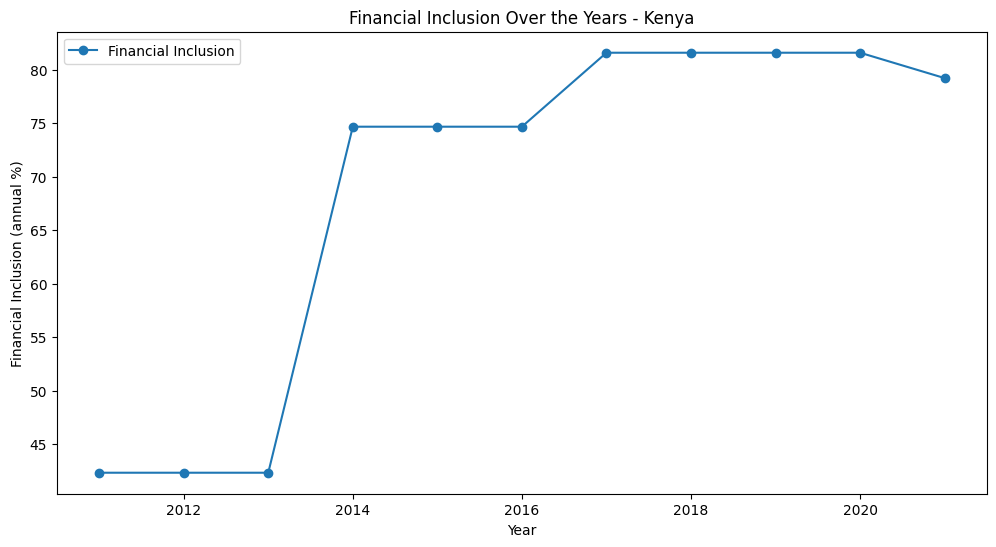

In [13]:
# Plotting Financial Inclusion over the years
plt.figure(figsize=(12, 6))
years = account_ownership_country.columns[1:].astype(int)  # Extracting years as integers
plt.plot(years, account_ownership_country.iloc[:, 1:].values.flatten(), marker='o', label='Financial Inclusion')
plt.title(f'Financial Inclusion Over the Years - {country}')
plt.xlabel('Year')
plt.ylabel('Financial Inclusion (annual %)')
plt.legend()
plt.show()


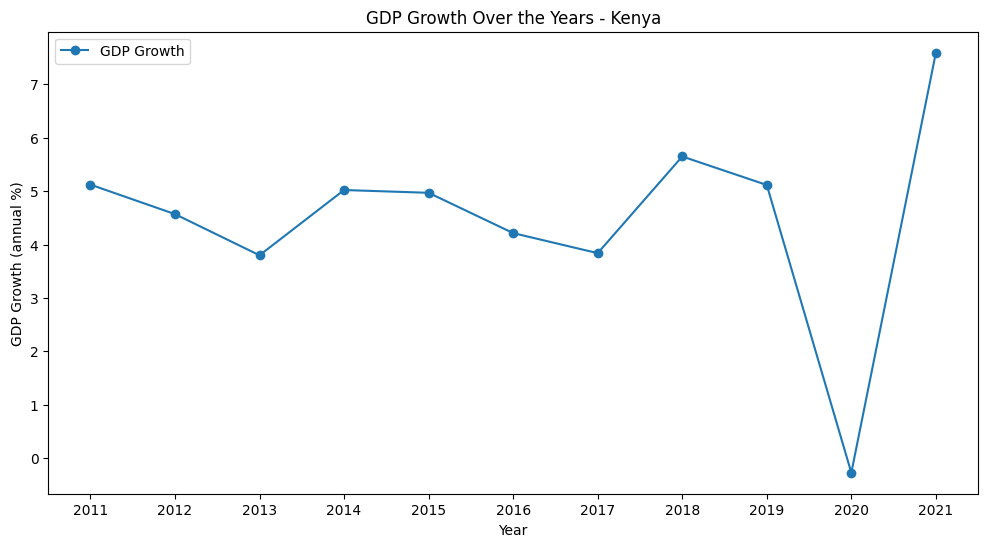

In [14]:
# Plotting GDP growth over the years
plt.figure(figsize=(12, 6))
plt.plot(gdp_country.columns[1:], gdp_country.iloc[:, 1:].values.flatten(), marker='o', label='GDP Growth')
plt.title(f'GDP Growth Over the Years - {country}')
plt.xlabel('Year')
plt.ylabel('GDP Growth (annual %)')
plt.legend()
plt.show()



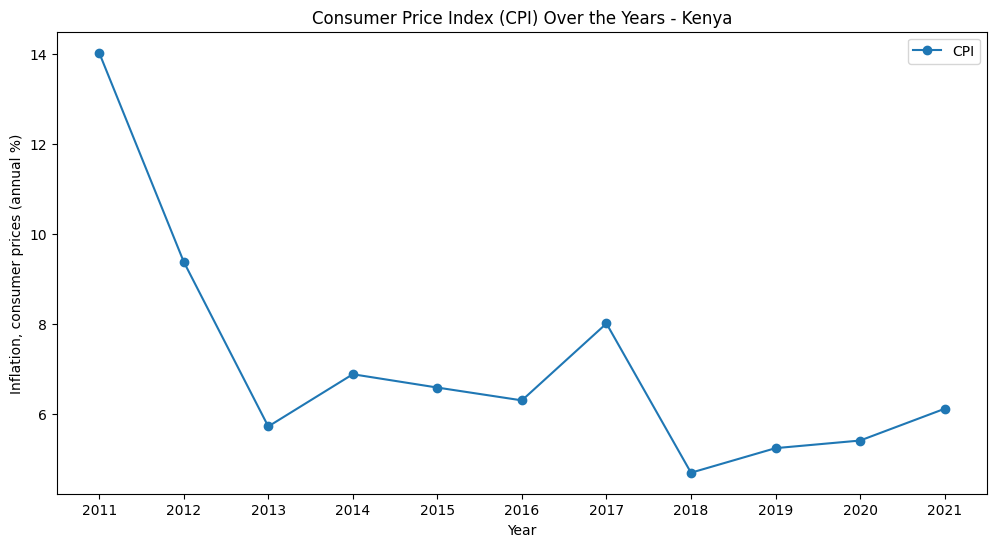

In [15]:
# Plotting CPI over the years
plt.figure(figsize=(12, 6))
plt.plot(cpi_country.columns[1:], cpi_country.iloc[:, 1:].values.flatten(), marker='o', label='CPI')
plt.title(f'Consumer Price Index (CPI) Over the Years - {country}')
plt.xlabel('Year')
plt.ylabel('Inflation, consumer prices (annual %)')
plt.legend()
plt.show()


In [16]:
# Transpose the dataframe - Account Ownership
account_ownership_country_T = account_ownership_country.T # Transpose the DataFrame

# View Transposed columns and rows
print("Columns in Account Ownership Kenya:")
print(account_ownership_country_T.columns)

print("\nRows in Account Ownership Kenya:")
print(account_ownership_country_T.head())



Columns in Account Ownership Kenya:
Int64Index([121], dtype='int64')

Rows in Account Ownership Kenya:
                           121
Indicator Code  FX.OWN.TOTL.ZS
2011                     42.34
2012                     42.34
2013                     42.34
2014                     74.66


In [17]:
# Reset the index and set column names
account_ownership_country_T.reset_index(inplace=True)
account_ownership_country_T.columns = ['Year', 'Account Ownership']

# Filter out the row with 'Indicator Code' equal to 'FX.OWN.TOTL.ZS'
account_ownership_country_T = account_ownership_country_T[account_ownership_country_T['Account Ownership'] != 'FX.OWN.TOTL.ZS']

# Reset the index and set column names
account_ownership_country_T.reset_index(drop=True, inplace=True)

# View Modified columns and rows
print("Columns in Account Ownership Kenya:")
print(account_ownership_country_T.columns)

print("\nRows in Account Ownership Kenya:")
print(account_ownership_country_T.head())


Columns in Account Ownership Kenya:
Index(['Year', 'Account Ownership'], dtype='object')

Rows in Account Ownership Kenya:
   Year Account Ownership
0  2011             42.34
1  2012             42.34
2  2013             42.34
3  2014             74.66
4  2015             74.66


In [18]:
# Transpose the dataframe - GDP

gdp_country_T = gdp_country.T # Transpose the DataFrame

# View Transposed columns and rows
print("Columns in GDP Kenya:")
print(gdp_country_T.columns)

print("\nRows in GDP Kenya:")
print(gdp_country_T.head())






Columns in GDP Kenya:
Int64Index([121], dtype='int64')

Rows in GDP Kenya:
                              121
Indicator Code  NY.GDP.MKTP.KD.ZG
2011                     5.121106
2012                      4.56868
2013                     3.797848
2014                     5.020111


In [19]:
# Reset the index and set column names
gdp_country_T.reset_index(inplace=True)

# Exclude the row with 'Indicator Code' and 'NY.GDP.MKTP.KD.ZG'
gdp_country_T = gdp_country_T[gdp_country_T['index'] != 'Indicator Code']

# Set column names
gdp_country_T.columns = ['Year', 'GDP']

# Inspect columns after setting column names
print("Columns after setting column names in GDP Kenya:")
print(gdp_country_T.columns)

print("\nRows in GDP Kenya:")
print(gdp_country_T.head())



Columns after setting column names in GDP Kenya:
Index(['Year', 'GDP'], dtype='object')

Rows in GDP Kenya:
   Year       GDP
1  2011  5.121106
2  2012   4.56868
3  2013  3.797848
4  2014  5.020111
5  2015  4.967721


In [20]:
# Transpose the dataframe - CPI

cpi_country_T = cpi_country.T # Transpose the DataFrame

# View Transposed columns and rows
print("Columns in CPI Kenya:")
print(cpi_country_T.columns)

print("\nRows in CPI Kenya:")
print(cpi_country_T.head())


Columns in CPI Kenya:
Int64Index([121], dtype='int64')

Rows in CPI Kenya:
                           121
Indicator Code  FP.CPI.TOTL.ZG
2011                 14.022494
2012                  9.377767
2013                  5.717494
2014                  6.878155


In [21]:
# Reset the index and set column names
cpi_country_T.reset_index(inplace=True)

# Exclude the row with 'Indicator Code' and 'FP.CPI.TOTL.ZG'
cpi_country_T = cpi_country_T[cpi_country_T['index'] != 'Indicator Code']

# Set column names
cpi_country_T.columns = ['Year', 'CPI']

# Inspect columns after setting column names
print("Columns after setting column names in CPI Kenya:")
print(cpi_country_T.columns)

print("\nRows in CPI Kenya:")
print(cpi_country_T.head())



Columns after setting column names in CPI Kenya:
Index(['Year', 'CPI'], dtype='object')

Rows in CPI Kenya:
   Year        CPI
1  2011  14.022494
2  2012   9.377767
3  2013   5.717494
4  2014   6.878155
5  2015   6.582174


In [22]:
import statsmodels.api as sm

# Merge the DataFrames on 'Year'
merged_data = pd.merge(account_ownership_country_T, gdp_country_T, on='Year')
merged_data = pd.merge(merged_data, cpi_country_T, on='Year')


In [23]:
# Convert columns to numeric
merged_data[['Account Ownership', 'GDP', 'CPI']] = merged_data[['Account Ownership', 'GDP', 'CPI']].apply(pd.to_numeric)



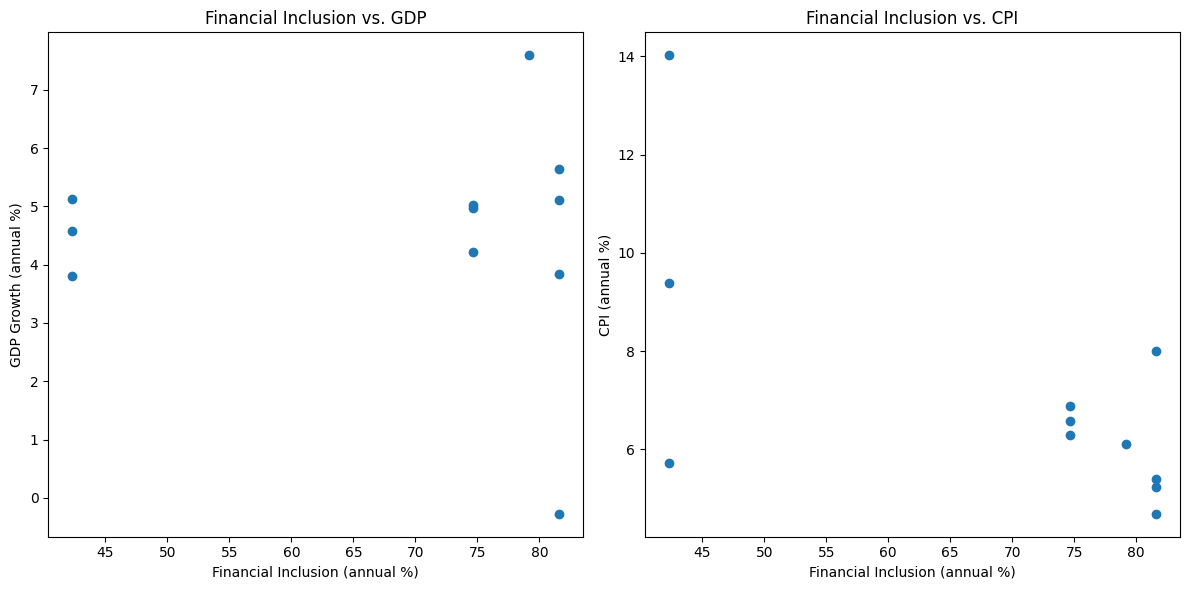

In [24]:
# Visualize the relationship between variables in the merged dataframe before OLS
plt.figure(figsize=(12, 6))

# Plot Financial Inclusion vs. GDP
plt.subplot(1, 2, 1)
plt.scatter(merged_data['Account Ownership'], merged_data['GDP'])
plt.title('Financial Inclusion vs. GDP')
plt.xlabel('Financial Inclusion (annual %)')
plt.ylabel('GDP Growth (annual %)')

# Plot Financial Inclusion vs. CPI
plt.subplot(1, 2, 2)
plt.scatter(merged_data['Account Ownership'], merged_data['CPI'])
plt.title('Financial Inclusion vs. CPI')
plt.xlabel('Financial Inclusion (annual %)')
plt.ylabel('CPI (annual %)')

plt.tight_layout()
plt.show()

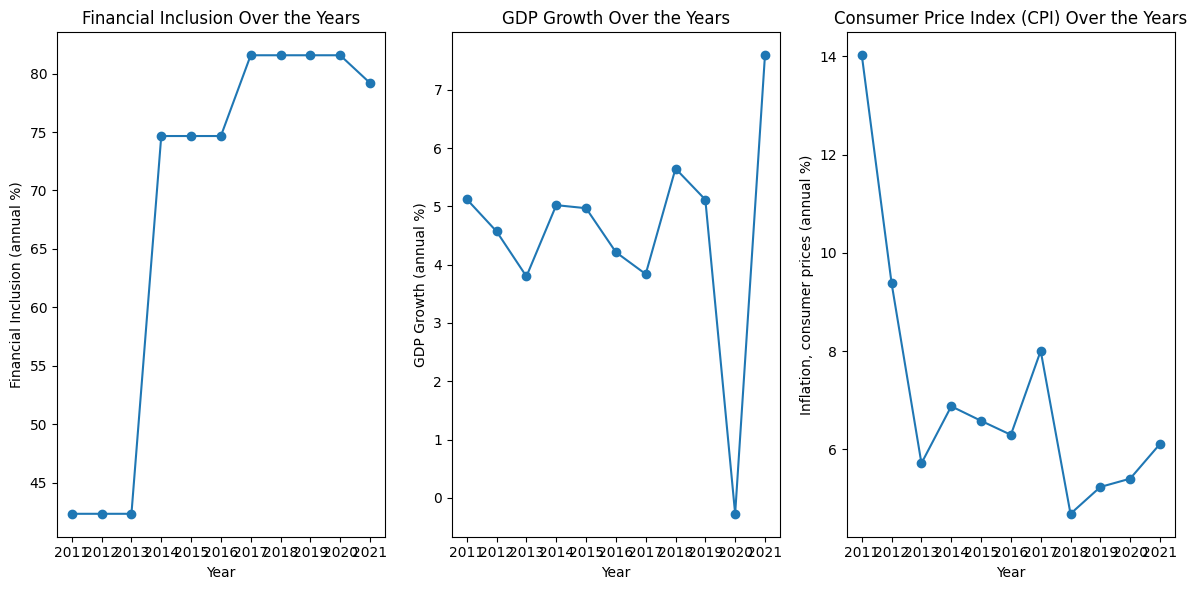

In [25]:
# Visualize the relationship before OLS using line graphs
plt.figure(figsize=(12, 6))

# Plot Financial Inclusion over the years
plt.subplot(1, 3, 1)
plt.plot(merged_data['Year'], merged_data['Account Ownership'], marker='o')
plt.title('Financial Inclusion Over the Years')
plt.xlabel('Year')
plt.ylabel('Financial Inclusion (annual %)')

# Plot GDP growth over the years
plt.subplot(1, 3, 2)
plt.plot(merged_data['Year'], merged_data['GDP'], marker='o')
plt.title('GDP Growth Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP Growth (annual %)')

# Plot CPI over the years
plt.subplot(1, 3, 3)
plt.plot(merged_data['Year'], merged_data['CPI'], marker='o')
plt.title('Consumer Price Index (CPI) Over the Years')
plt.xlabel('Year')
plt.ylabel('Inflation, consumer prices (annual %)')

plt.tight_layout()
plt.show()


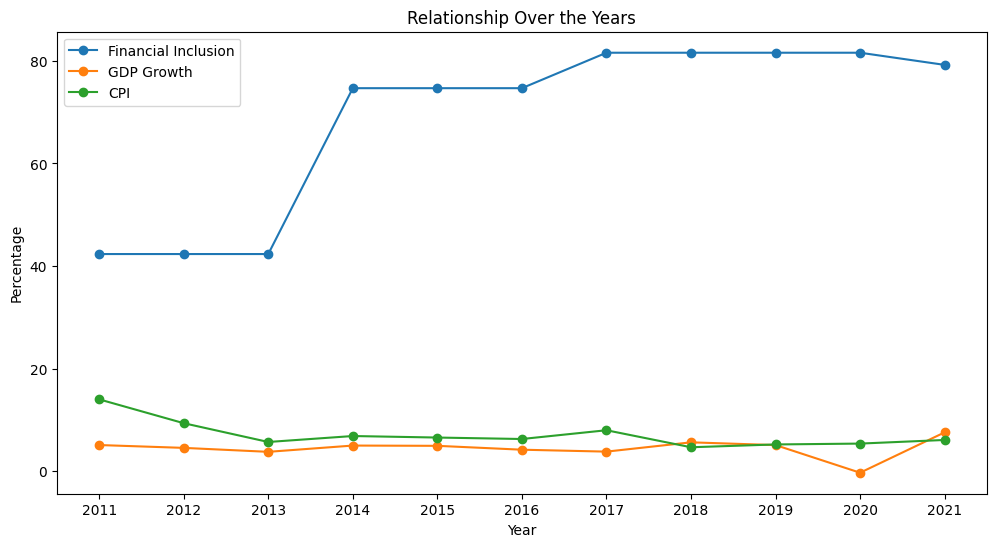

In [26]:
# Visualize the relationship before OLS using combined line graph
plt.figure(figsize=(12, 6))

# Plot Financial Inclusion, GDP, and CPI over the years
plt.plot(merged_data['Year'], merged_data['Account Ownership'], marker='o', label='Financial Inclusion')
plt.plot(merged_data['Year'], merged_data['GDP'], marker='o', label='GDP Growth')
plt.plot(merged_data['Year'], merged_data['CPI'], marker='o', label='CPI')

# Set labels and title
plt.title('Relationship Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()

plt.show()


OLS Regression to determine Relationship between Financial Inclusion and Economic Growth (GDP and CPI)

In [27]:
# OLS Regression for Financial Inclusion and GDP
X_gdp = sm.add_constant(merged_data['Account Ownership'])
y_gdp = merged_data['GDP']
model_gdp = sm.OLS(y_gdp, X_gdp).fit()



In [28]:
# OLS Regression for Financial Inclusion and CPI
X_cpi = sm.add_constant(merged_data['Account Ownership'])
y_cpi = merged_data['CPI']
model_cpi = sm.OLS(y_cpi, X_cpi).fit()



In [29]:
# Display regression results
print("OLS Regression Results for Financial Inclusion and GDP:")
print(model_gdp.summary())

print("\nOLS Regression Results for Financial Inclusion and CPI:")
print(model_cpi.summary())


OLS Regression Results for Financial Inclusion and GDP:
                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.110
Method:                 Least Squares   F-statistic:                  0.009012
Date:                Thu, 29 Feb 2024   Prob (F-statistic):              0.926
Time:                        20:57:18   Log-Likelihood:                -22.111
No. Observations:                  11   AIC:                             48.22
Df Residuals:                       9   BIC:                             49.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


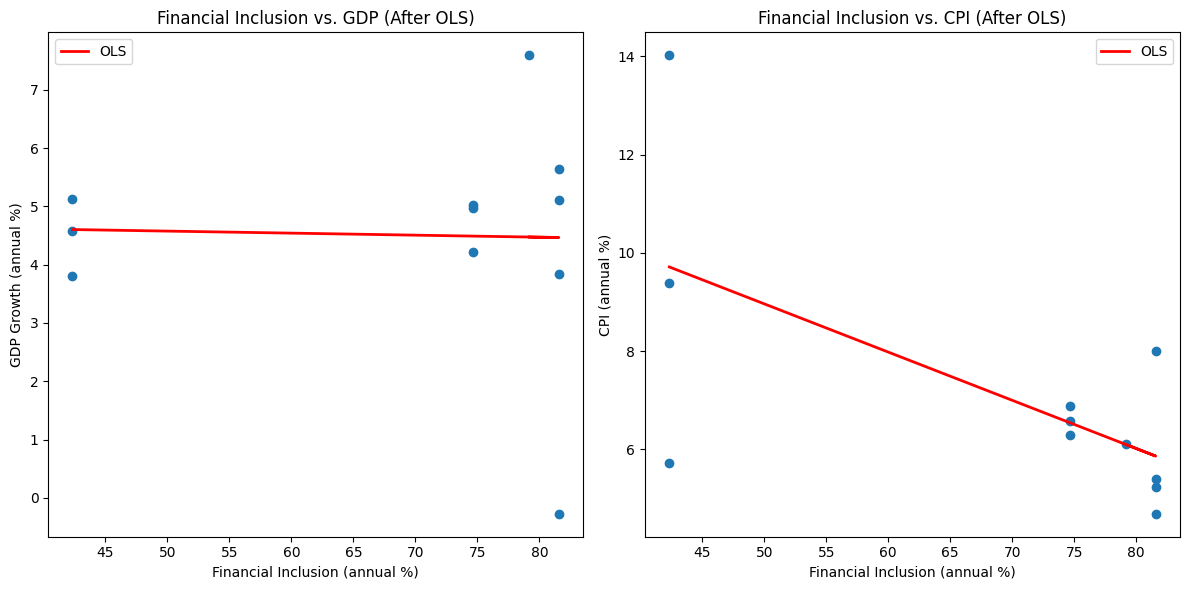

In [30]:
# Visualize the relationship after OLS
plt.figure(figsize=(12, 6))

# Plot Financial Inclusion vs. GDP
plt.subplot(1, 2, 1)
plt.scatter(merged_data['Account Ownership'], merged_data['GDP'])
plt.plot(merged_data['Account Ownership'], model_gdp.predict(), color='red', linewidth=2, label='OLS')
plt.title('Financial Inclusion vs. GDP (After OLS)')
plt.xlabel('Financial Inclusion (annual %)')
plt.ylabel('GDP Growth (annual %)')
plt.legend()

# Plot Financial Inclusion vs. CPI
plt.subplot(1, 2, 2)
plt.scatter(merged_data['Account Ownership'], merged_data['CPI'])
plt.plot(merged_data['Account Ownership'], model_cpi.predict(), color='red', linewidth=2, label='OLS')
plt.title('Financial Inclusion vs. CPI (After OLS)')
plt.xlabel('Financial Inclusion (annual %)')
plt.ylabel('CPI (annual %)')
plt.legend()

plt.tight_layout()
plt.show()

Model Saving for Deployment

In [32]:
# Save OLS regression models
with open('model_gdp.pkl', 'wb') as file:
    pickle.dump(model_gdp, file)

with open('model_cpi.pkl', 'wb') as file:
    pickle.dump(model_cpi, file)
